In [1]:
import pandas as pd

sensor_data = "../all respondents data/001_b45731a0-0a40-4a59-bbef-5f24c3ddc89f.csv"
cognitive_phase_data = "001-cognitive-phase.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)

# Check if a categorical value exists in the DataFrame
if df_phases['Cognitive Task'].isin(['Data Exploration']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

# Rename categorical values in a column
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].replace({'Data Exploration': 'Explore'})



The categorical value exists in the DataFrame


In [2]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


     Time Started       Cognitive Task              Screens
0        162000.0              Explore                  Map
1        167000.0              Explore  Supporting material
2        180000.0              Explore                  Map
3        185000.0  Generate Hypothesis  Supporting material
4        221000.0  Generate Hypothesis  Supporting material
..            ...                  ...                  ...
165     2545000.0       Assess Results                  Map
166     2551000.0      Test Hypothesis               Filter
167     2557000.0       Assess Results                  Map
168     2564000.0       Assess Results           Statistics
169     2602000.0             Conclude  Supporting material

[170 rows x 3 columns]
float64


In [3]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
# final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df = merged_df.drop(['Row','EventSource','SlideEvent','StimType','Duration','CollectionPhase','SourceStimuliName','EventSource.1','SampleNumber','EventSource.2','ET_TimeSignal','ET_PupilLeft','ET_PupilRight','ET_DistanceLeft','ET_DistanceRight','ET_GazeLeftx','ET_GazeLefty','ET_GazeRightx','ET_GazeRighty','ET_ValidityLeftEye','ET_ValidityRightEye','ET_CameraLeftX','ET_CameraLeftY','ET_CameraRightX','ET_CameraRightY','EventSource.3','Gaze X','Gaze Y','Saccade Index','Saccade Index by Stimulus','Saccade Start','Saccade End','Fixation Index','Fixation Index by Stimulus','Fixation Start','Fixation End','Time Started'], axis=1)
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Fixation Duration,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Cognitive Task,Screens
0,36101.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36109.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,144.5,10.863743,187.888661,1271.556906,-1870.86541,39.448696,NaN,NaN
2,36142.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,144.5,10.863743,187.888661,1271.556906,-1870.86541,39.448696,NaN,NaN
3,36174.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,144.5,10.863743,187.888661,1271.556906,-1870.86541,39.448696,NaN,NaN
4,36206.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset='Contempt')
final_df.to_csv('001-b45731a0_emotions_with_cognitive_task_and_screen.csv', index=False)
final_df.tail()
print(final_df.shape[0])

79345


In [112]:
# display(final_df.sample(15))

In [5]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Fixation X,Fixation Y,Fixation Duration,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction
count,7.934500e+04,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.369204e+06,1.178749,0.236420,0.376627,1.479852,5.937353,0.285892,0.686932,22.137284,7.244925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.685357e+05,3.338498,2.155168,3.247520,5.349511,22.369736,2.558369,4.342761,33.044594,23.321146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.623600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-67.881241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.040750e+05,0.141558,0.151043,0.024630,0.138986,0.024360,0.115063,0.059034,0.328766,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.369136e+06,0.246804,0.187501,0.031779,0.235411,0.025323,0.125685,0.076229,0.643951,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.034843e+06,0.923253,0.192106,0.123546,0.839612,0.033621,0.127124,0.216277,46.902702,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.700073e+06,94.093216,97.368004,93.648643,95.832893,99.979645,81.516922,99.069252,99.981064,99.933968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0       Assess Results  0.204470  0.190210  0.028584  0.213075  0.024695   
1             Conclude  0.271076  0.188697  0.040446  0.240705  0.024864   
2              Explore  0.131362  0.170625  0.023144  0.131497  0.029263   
3                Focus  0.188421  0.181435  0.031294  0.174504  0.027061   
4  Generate Hypothesis  0.380157  0.171775  0.047884  0.332030  0.029640   
5             Set Goal  0.342857  0.184415  0.045607  0.316537  0.026012   
6      Test Hypothesis  0.237402  0.185941  0.030531  0.215016  0.025639   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.126405  0.073854    0.328766        0.106886   0.048119  
1  0.125942  0.072432    0.623257        0.071212   0.038781  
2  0.120726  0.059707    0.328766        0.221535   0.012519  
3  0.125110  0.068558    1.282392        0.207931   0.047917  
4  0.119789  0.093780    7.327151        0.111057   0.051561  
5  0.124909  

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Assess Results,0.204470,0.190210,0.028584,0.213075,0.024695,0.126405,0.073854,0.328766,0.106886,0.048119
1,Conclude,0.271076,0.188697,0.040446,0.240705,0.024864,0.125942,0.072432,0.623257,0.071212,0.038781
2,Explore,0.131362,0.170625,0.023144,0.131497,0.029263,0.120726,0.059707,0.328766,0.221535,0.012519
3,Focus,0.188421,0.181435,0.031294,0.174504,0.027061,0.125110,0.068558,1.282392,0.207931,0.047917
4,Generate Hypothesis,0.380157,0.171775,0.047884,0.332030,0.029640,0.119789,0.093780,7.327151,0.111057,0.051561


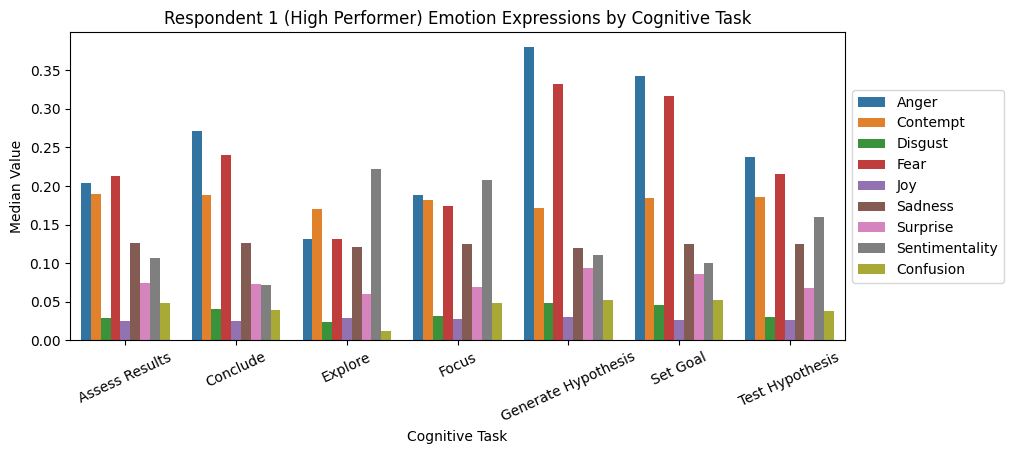

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

medians_to_plot = medians.drop(['Engagement', 'Cognitive Task Encoded'], axis=1)

# Melt the dataframe to convert emotions into a column
melted_df = medians_to_plot.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Median Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Median Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Respondent 1 (High Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Median Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


<h3>Mean</h3>

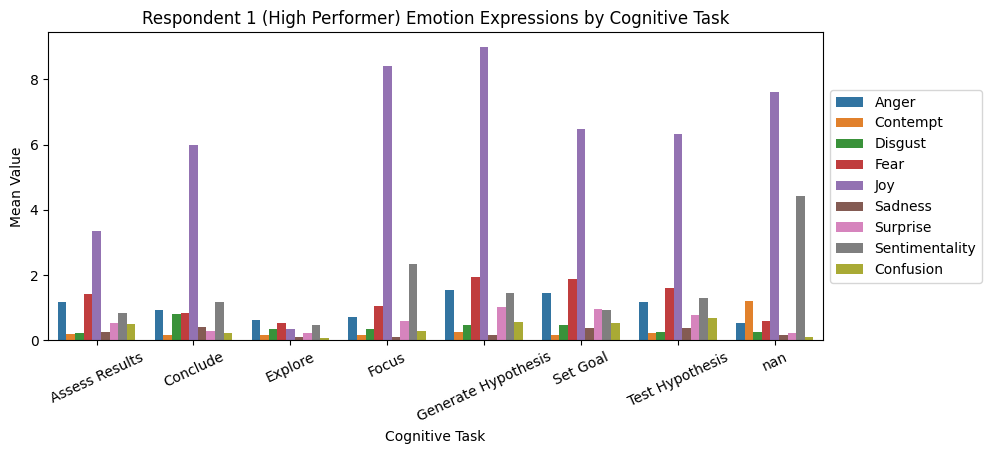

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace string representation of NaN with actual NaN value
final_df['Cognitive Task'] = final_df['Cognitive Task'].replace('nan', np.nan)

# Remove nan values from Cognitive Task column
final_df = final_df.dropna(subset=['Cognitive Task'])

# Create means df
means = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).mean()
# Reset index and add 'Cognitive Task' as a column
means = means.reset_index()
means['Cognitive Task'] = means['Cognitive Task']

means_to_plot = means.dropna(subset=['Cognitive Task'])

# Melt the dataframe to convert emotions into a column
melted_df = means_to_plot.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Mean Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Mean Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Respondent 1 (High Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Mean Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [32]:
print(final_df['Cognitive Task'].unique())
missing_values = final_df['Cognitive Task'].isnull().sum()
print("Number of missing values in 'Cognitive Task' column:", missing_values)

missing_values = final_df['Cognitive Task'].isnull().sum()
print("Number of missing values in 'Cognitive Task' column:", missing_values)

unique_values = final_df['Cognitive Task'].unique()
print("Unique values in 'Cognitive Task' column:", unique_values)




['nan' 'Explore' 'Generate Hypothesis' 'Set Goal' 'Focus'
 'Test Hypothesis' 'Assess Results' 'Conclude']
Number of missing values in 'Cognitive Task' column: 0
Number of missing values in 'Cognitive Task' column: 0
Unique values in 'Cognitive Task' column: ['nan' 'Explore' 'Generate Hypothesis' 'Set Goal' 'Focus'
 'Test Hypothesis' 'Assess Results' 'Conclude']


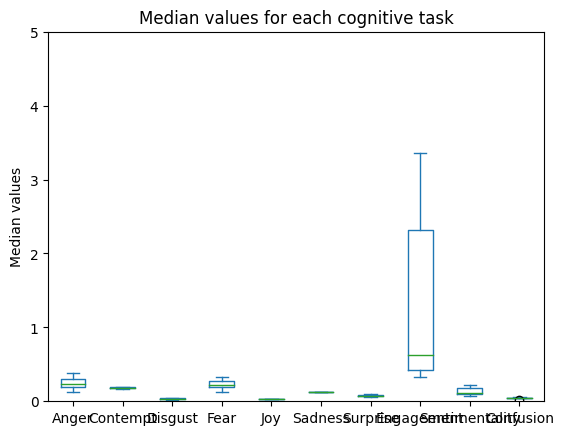

In [7]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [8]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


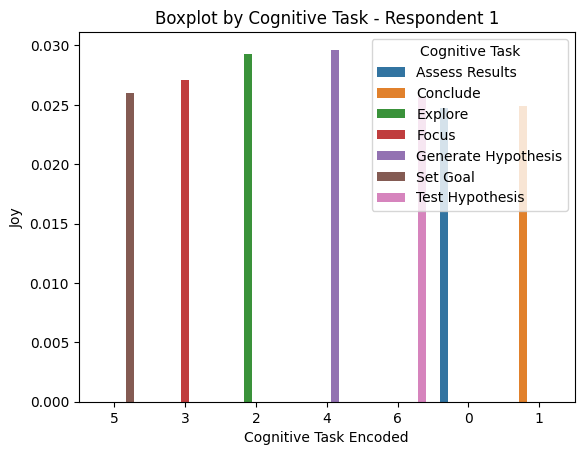

In [9]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Joy', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 1")

# Display the plot
plt.show()


In [10]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger             0.246804
Contempt          0.187501
Disgust           0.031779
Fear              0.235411
Joy               0.025323
Sadness           0.125685
Surprise          0.076229
Engagement        0.643951
Sentimentality    0.109278
Confusion         0.045959
dtype: float64

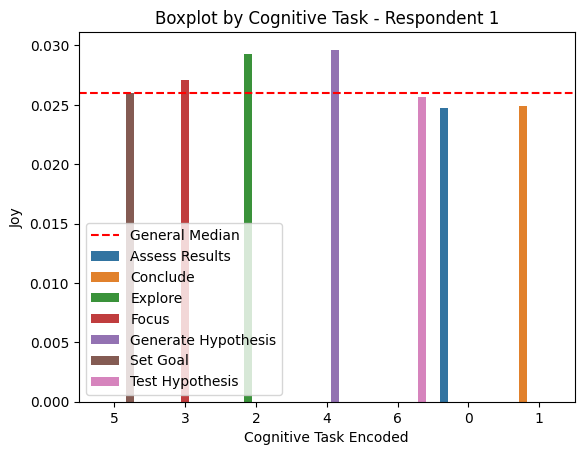

In [11]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Joy'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Joy', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 1")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Add legend
plt.legend()

# Display the plot
plt.show()


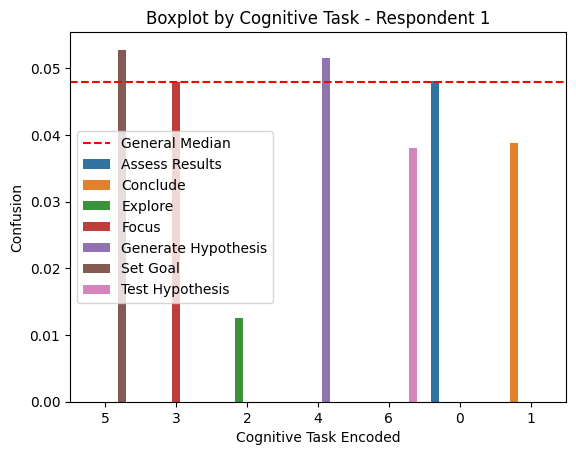

In [12]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 1")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Add legend
plt.legend()

# Display the plot
plt.show()


<h3>Final Dataframe Cognitive Task Distribution </h3>

Number of NaN values in 'Cognitive Task' column:  0


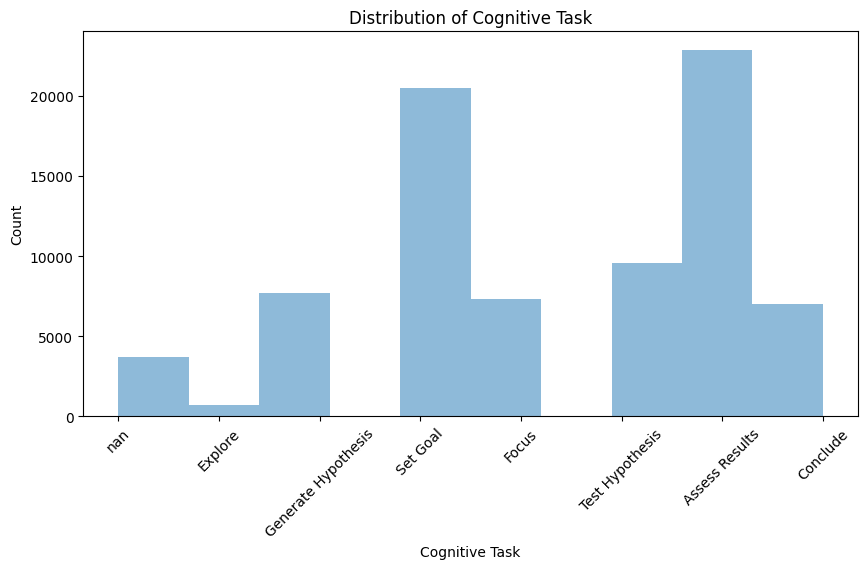

In [13]:
import matplotlib.pyplot as plt
import pandas as pd


# Convert the Cognitive Task column to a string type
final_df['Cognitive Task'] = final_df['Cognitive Task'].astype(str)

# Count the number of NaN values in the Cognitive Task column
nan_count = final_df['Cognitive Task'].isna().sum()

# Print the result
print("Number of NaN values in 'Cognitive Task' column: ", nan_count)

# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(final_df['Cognitive Task'], alpha=0.5)

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()


<h3>Original Cognitive Task Distribution </h3>

Number of NaN values in 'Cognitive Task' column:  0


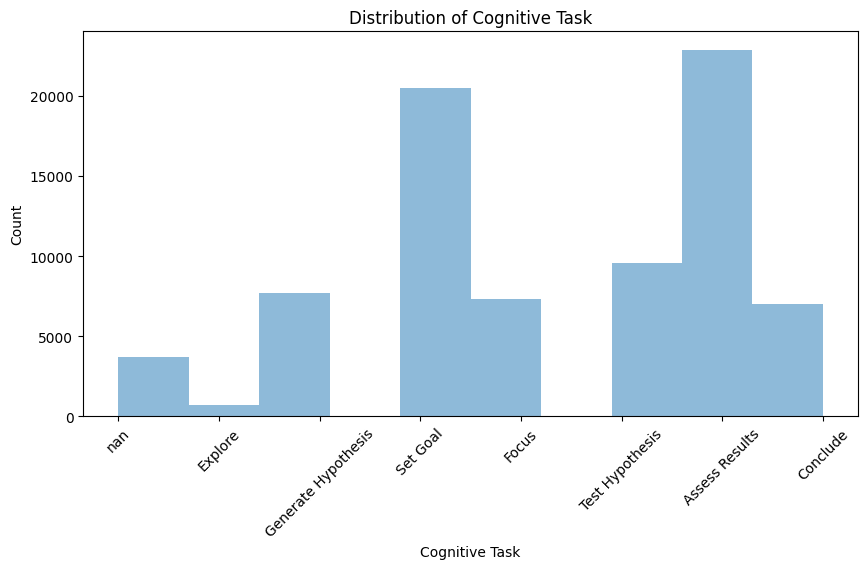

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df_phases = pd.read_csv(cognitive_phase_data)

# Convert the Cognitive Task column to a string type
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].astype(str)

# Count the number of NaN values in the Cognitive Task column
nan_count = df_phases['Cognitive Task'].isna().sum()

# Print the result
print("Number of NaN values in 'Cognitive Task' column: ", nan_count)

# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(final_df['Cognitive Task'], alpha=0.5)

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
